Fontconfig warning: ignoring UTF-8: not a valid region tag


<AxesSubplot: >

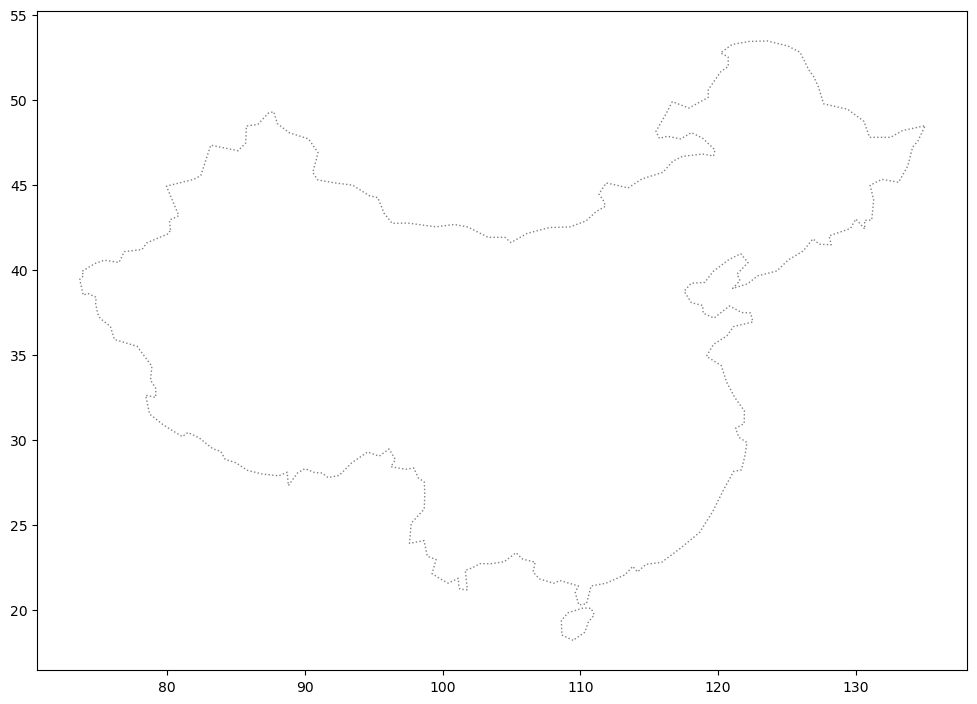

In [2]:
import geopandas as gpd

# 画国家的边境线
# alpha 透明度
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
china = world.loc[world.name.str.contains('China')]
china.plot(figsize=(12, 12), color='white',
                linestyle=':', edgecolor='gray')
# path.plot(ax=ax, color='red', markersize=30, alpha=0.4)
# 根据Point画出Line